## read in data

In [1]:
# param
version = 'v20250301'
prop = 'soc'
tgt = 'soc_log1p'
space = 'normal'
output_folder = './metric/'

In [2]:
# data
import pandas as pd
import numpy as np
cal = pd.read_parquet(f'./material/data_cal_{version}.pq')
print(cal.shape)

(5000, 422)


In [3]:
# covariate
covs = cal.columns[13::].tolist()
covs.remove('type')
covs.remove('tile_id')
covs.remove('soc_log1p')

## feature selection

In [4]:
from model_fit import cfi_calc
cal = cal.dropna(subset = covs+[tgt])
cfi = cfi_calc(cal, tgt, prop, space, output_folder, version, covs) # produce

start bootstrap on different subset...
[15:08:54] 0 iteration, training size: 3500
[15:08:58] 1 iteration, training size: 3500
[15:09:01] 2 iteration, training size: 3500
[15:09:04] 3 iteration, training size: 3500
[15:09:07] 4 iteration, training size: 3500
[15:09:11] 5 iteration, training size: 3500
[15:09:14] 6 iteration, training size: 3500
[15:09:17] 7 iteration, training size: 3500
[15:09:21] 8 iteration, training size: 3500
[15:09:24] 9 iteration, training size: 3500
[15:09:27] 10 iteration, training size: 3500
[15:09:30] 11 iteration, training size: 3500
[15:09:33] 12 iteration, training size: 3500
[15:09:37] 13 iteration, training size: 3500
[15:09:40] 14 iteration, training size: 3500
[15:09:44] 15 iteration, training size: 3500
[15:09:47] 16 iteration, training size: 3500
[15:09:50] 17 iteration, training size: 3500
[15:09:53] 18 iteration, training size: 3500
[15:09:57] 19 iteration, training size: 3500


[15:10:00] processing 0.0 ...
[15:10:17] processing 0.0002 ...
[15:10:33] processing 0.0004 ...
[15:10:49] processing 0.0006000000000000001 ...
[15:11:04] processing 0.0008 ...
[15:11:20] processing 0.001 ...
[15:11:35] processing 0.0012000000000000001 ...
[15:11:50] processing 0.0014 ...
[15:12:04] processing 0.0016 ...
[15:12:17] processing 0.0018000000000000002 ...
[15:12:29] processing 0.002 ...
[15:12:40] processing 0.0022 ...
[15:12:50] processing 0.0024000000000000002 ...
[15:12:59] processing 0.0026000000000000003 ...
[15:13:07] processing 0.0028 ...
[15:13:14] processing 0.003 ...
[15:13:20] processing 0.0032 ...
[15:13:26] processing 0.0034000000000000002 ...
[15:13:31] processing 0.0036000000000000003 ...
[15:13:36] processing 0.0038 ...
[15:13:40] processing 0.004 ...
[15:13:43] processing 0.004200000000000001 ...
[15:13:46] processing 0.0044 ...
[15:13:48] processing 0.0046 ...
[15:13:51] processing 0.0048000000000000004 ...
[15:13:53] processing 0.005 ...
[15:13:54] proce

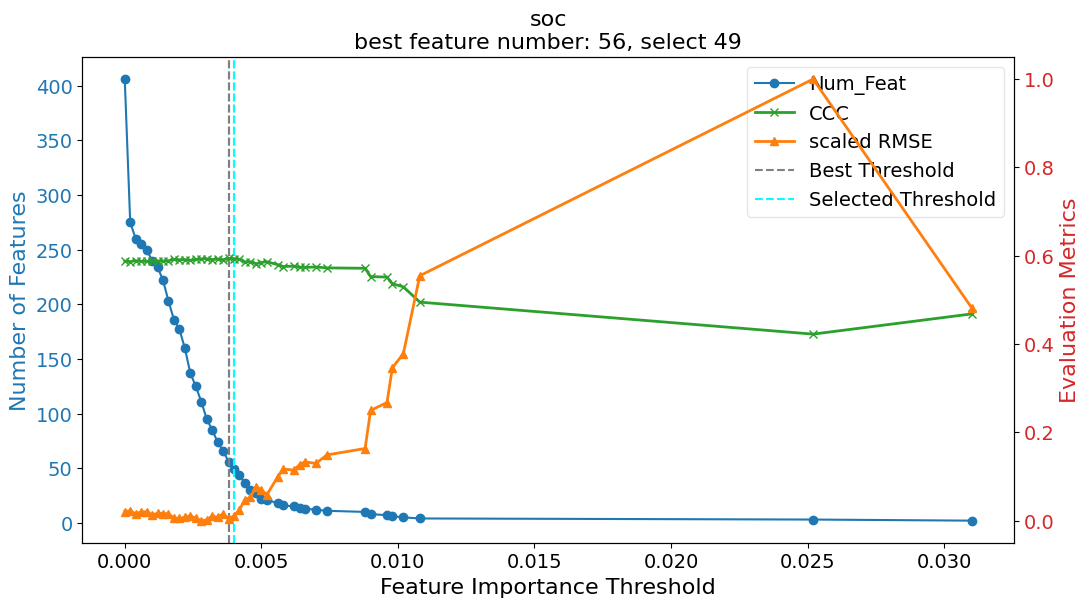

In [5]:
from model_fit import rscfi
cov = rscfi(cal, tgt, prop, space, output_folder, version, covs, cfi, [10,50], step_size=0.0002) # produce

## paramter fine-tuning

In [6]:
from model_fit import parameter_fine_tuning, read_features
models, model_names = parameter_fine_tuning(cal, cov, tgt, prop, './model/', version)

[15:14:10] ----------------------rf------------------------
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 20
max_resources_: 5000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 405
n_resources: 20
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
----------
iter: 1
n_candidates: 135
n_resources: 60
Fitting 5 folds for each of 135 candidates, totalling 675 fits
----------
iter: 2
n_candidates: 45
n_resources: 180
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 3
n_candidates: 15
n_resources: 540
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 4
n_candidates: 5
n_resources: 1620
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 5
n_candidates: 2
n_resources: 4860
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [7]:
models[0]


RandomForestRegressor(max_depth=30, max_features=0.3, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=120)

In [1]:
import joblib
model = joblib.load('/home/xuemeng/work_xuemeng/trend-with-uncertainty/model/model_rf.soc_ccc_v20250301.joblib')
len(model.feature_names_in_)

49

In [3]:
model.feature_names_in_

array(['ndvi_glad.landsat.ard2.seasconv.longterm_p25_30m_s_20000101_20221231_eu_epsg.3035_v20231127',
       'fapar_glad.landsat.ard2.seasconv.longterm_p25_30m_s_20000101_20221231_eu_epsg.3035_v20231218',
       'ndti_glad.landast.ard2.seasconv.m.yearly_p25_30m_s_YYYY0101_YYYY1231_eu_epsg.3035_v20231127',
       'CHELSA_ai_1981-2010_V.2.1', 'CHELSA_gdgfgd10_1981-2010_V.2.1',
       'CHELSA_scd_1981-2010_V.2.1',
       'soil.moisture_s1.clms.qr.4.p0.5_m_1km_20140101_20241231_eu_epsg3035_v20250211',
       'wv_mcd19a2v061.seasconv.m.yearly_sd_1km_s_YYYY0101_YYYY1231_go_epsg.4326_v20230619',
       'peatland.extent_wri.gfw.peatgrids_p_1km_s_2000_2020_go_epsg4326_v20241017',
       'green_glad.landsat.ard2.seasconv.m.yearly_p50_30m_s_YYYY0101_YYYY1231_eu_epsg.3035_v20231127',
       'wv_mcd19a2v061.seasconv.m.yearly_p50_1km_s_YYYY0101_YYYY1231_go_epsg.4326_v20230619',
       'CHELSA_vpd_max_1981-2010_V.2.1', 'CHELSA_bio5_1981-2010_V.2.1',
       'clm_accum.precipitation_chelsa.annual_m_1km